In [21]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    LeakyReLU,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    GlobalMaxPooling2D

)
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense

import tensorflow as tf
import numpy as np
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt


In [41]:
# Load the data

cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(X_train.shape)
print(X_test.shape)
y_train.shape, y_test.shape

(50000, 32, 32, 3)
(10000, 32, 32, 3)


((50000,), (10000,))

In [50]:
# Build the model using the functional api

i = Input(shape = X_train[0].shape)


x = Conv2D(32,(3,3), activation ="relu", padding ='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), activation ="relu", padding ='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)

x = Conv2D(64,(3,3), activation ="relu", padding ='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), activation ="relu", padding ='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)

x = Conv2D(128,(3,3), activation ="relu", padding ='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), activation ="relu", padding ='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
# x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
# x = Dropout(0.2)(x)
x = Dense(10, activation = "softmax")(x)

model = Model(i, x)


In [51]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │      33,555,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,569,802 (128.06 MB)

 Trainable params: 33,569,546 (128.06 MB)

 Non-trainable params: 256 (1.00 KB)

In [52]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [29]:

history = model.fit(
    X_train, y_train,
    epochs = 10,
    validation_data = (X_test, y_test),
    verbose = 1,
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2733 - loss: 2.0283 - val_accuracy: 0.3995 - val_loss: 1.6480
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3823 - loss: 1.7097 - val_accuracy: 0.4386 - val_loss: 1.5912
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4045 - loss: 1.6520 - val_accuracy: 0.4530 - val_loss: 1.5339
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4238 - loss: 1.6054 - val_accuracy: 0.4602 - val_loss: 1.5212
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4296 - loss: 1.5887 - val_accuracy: 0.4857 - val_loss: 1.4932
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4355 - loss: 1.5678 - val_accuracy: 0.4596 - val_loss: 1.5652
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4468 - loss: 1.5444 - val_accuracy: 0.4842 - val_loss: 1.4933
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4527 - loss: 1.5317

In [53]:
# Fit with data augmentation

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,        # Randomly shift images horizontally (10% of width)
    height_shift_range=0.1,       # Randomly shift images vertically (10% of height)
    # rotation_range=20,            # Randomly rotate images by up to 20 degrees
    # zoom_range=0.2,               # Randomly zoom in/out on images (up to 20%)
    # shear_range=0.2,              # Randomly apply shearing transformations
    # horizontal_flip=True,         # Randomly flip images horizontally
    # brightness_range=(0.8, 1.2),  # Randomly adjust brightness (80% to 120%)
    # fill_mode='nearest'           # Fill missing pixels with the nearest value
)

train_generator = data_generator.flow(X_train, y_train, batch_size)

steps_per_epoch = X_train.shape[0] // batch_size

history = model.fit(
    train_generator,
    epochs = 10,
    steps_per_epoch=steps_per_epoch,
    validation_data = (X_test, y_test),
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - accuracy: 0.4256 - loss: 2.2593 - val_accuracy: 0.4819 - val_loss: 1.5722
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6250 - loss: 1.0550

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.6250 - loss: 1.0550 - val_accuracy: 0.4998 - val_loss: 1.4968
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5711 - loss: 1.2154 - val_accuracy: 0.5679 - val_loss: 1.2832
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.6250 - loss: 1.0481 - val_accuracy: 0.5603 - val_loss: 1.3096
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.6106 - loss: 1.1021 - val_accuracy: 0.6335 - val_loss: 1.0685
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.6562 - loss: 1.1650 - val_accuracy: 0.6312 - val_loss: 1.0670
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6373 - loss: 1.0250 - val_accuracy: 0.6396 - val_loss: 1.0478
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.5625 - loss: 0.9167 - val_accuracy: 0.6460 - val_loss: 1.0290
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6654 - loss: 0.95

# Training and Evaluation

In [54]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6437 - loss: 1.0890
Test loss: 1.1073659658432007
Test accuracy: 0.6431000232696533


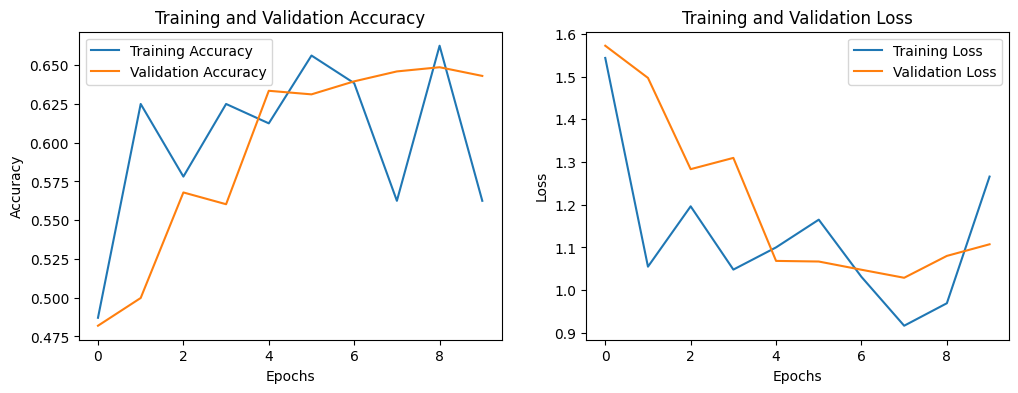

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Define class names (replace these with actual class names if available)
CLASS_NAMES = class_names

# Function to plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot curves
plot_training_curves(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

    Airplane       0.66      0.72      0.69      1000
  Automobile       0.80      0.81      0.81      1000
        Bird       0.51      0.56      0.53      1000
         Cat       0.55      0.36      0.43      1000
        Deer       0.69      0.38      0.49      1000
         Dog       0.65      0.43      0.52      1000
        Frog       0.46      0.93      0.62      1000
       Horse       0.76      0.71      0.74      1000
        Ship       0.78      0.80      0.79      1000
       Truck       0.78      0.73      0.76      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000

Precision: 0.66, Recall: 0.64, F1 Score: 0.64


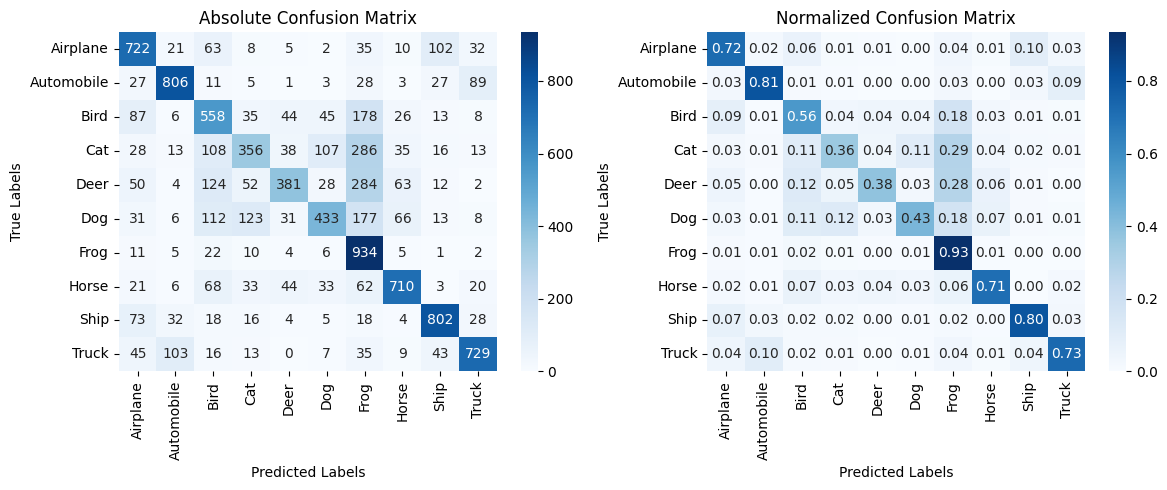

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on test data
Y_pred = model.predict(X_test)  # Predictions for the test set
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert predicted probabilities to class indices

# True labels
Y_true = y_test  # Ground truth labels from the test set

# Define class names (if not already defined)
class_names = classes

# Generate a classification report
print("Classification Report:\n", classification_report(Y_true, Y_pred_classes, target_names=class_names))

# Calculate precision, recall, and F1-score
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

# Calculate confusion matrices
abs_conf_matrix = confusion_matrix(Y_true, Y_pred_classes)  # Absolute confusion matrix
norm_conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')  # Normalized confusion matrix

# Plot absolute confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(abs_conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title("Absolute Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(norm_conf_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


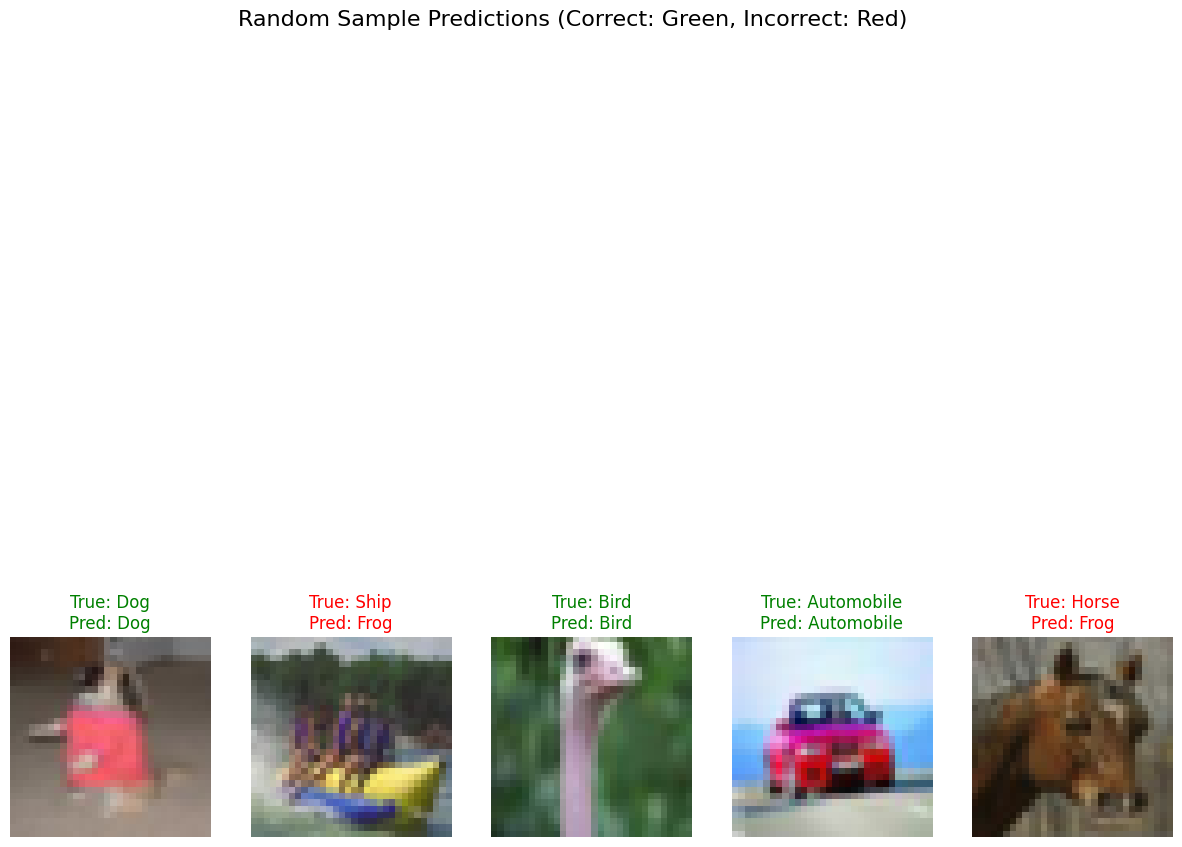

In [58]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on test data
Y_pred = model.predict(X_test)  # Predictions for the test set
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert predicted probabilities to class indices

# True labels
Y_true = y_test  # Ground truth labels from the test set

# Define class labels
class_labels = class_names

# Function to randomly sample images and check predictions
def plot_random_samples(X_data, Y_true, Y_pred_classes, class_labels, n=10):
    random_indices = np.random.choice(len(X_data), size=n, replace=False)  # Randomly select `n` indices
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, n, i + 1)
        plt.imshow(X_data[idx], cmap='gray')  # Assuming grayscale images
        true_label = class_labels[Y_true[idx]]  # Map integer to class name
        pred_label = class_labels[Y_pred_classes[idx]]  # Map integer to class name
        color = "green" if Y_true[idx] == Y_pred_classes[idx] else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis('off')
    plt.suptitle("Random Sample Predictions (Correct: Green, Incorrect: Red)", fontsize=16)
    plt.show()

# Choose `n` random samples and visualize
n = 10  # Number of random samples to display
plot_random_samples(X_test, Y_true, Y_pred_classes, class_labels, n=5)